In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=500,n_features=5,n_informative=5,n_redundant=0,n_clusters_per_class=1)

In [9]:
df = pd.DataFrame(X,columns=['A','B','C','D','E'])
df['Target'] = y
print(f"The shape of dataFrame is : {df.shape}")

The shape of dataFrame is : (500, 6)


In [11]:
df.head()

,A,B,C,D,E,Target
0,3.892671,-0.419334,-0.710171,3.828328,-4.112151,1
1,-0.713959,0.140960,1.190088,-0.719215,-0.693970,1
2,0.720558,0.370560,0.561849,0.223360,-1.662768,1
3,2.901925,1.249349,0.004163,0.074045,-2.269429,1
4,1.605733,0.312102,0.820554,1.650365,-1.891232,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='A', ylabel='B'>

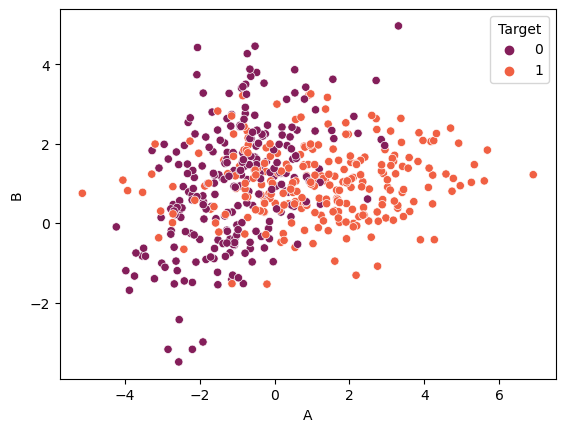

In [7]:
sns.scatterplot(x="A",y="B",data=df,hue="Target",palette='rocket')

In [12]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [54]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df
     

In [55]:
# funnction for row+feature sampling 
def random_pathes(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

**Creating dataframes to train multiple dtrees for our understanding we are going to train 3 dtrees**

***Row Sampling***

In [59]:
df1 = sample_rows(df,0.25)
df1

,A,B,C,D,E,Target
248,-0.282947,0.285676,1.262876,-1.240264,-0.642151,1
37,1.662317,0.623036,0.421174,1.244438,-1.889293,1
350,1.061670,0.932057,1.353565,1.655492,-0.712956,1
50,-0.518611,1.400841,2.141237,1.428631,0.604339,1
21,-0.844755,1.766561,-0.335177,1.238504,0.989796,0
...,...,...,...,...,...,...
290,0.951881,1.959648,0.072663,2.390014,1.119431,1
18,4.956459,0.942328,-1.368464,3.084430,-4.159740,1
6,-0.166934,-0.140371,-3.312497,2.199387,-0.054735,0
153,0.825801,0.518372,1.384033,0.002262,-1.099424,1


In [60]:
df2 = sample_rows(df,0.25)
df3 =sample_rows(df,0.25)

**Creating decision trees and train them**

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [85]:
clf1.fit(df1.iloc[:,:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [86]:
from sklearn.tree import plot_tree

[Text(0.4375, 0.9166666666666666, 'X[4] <= 0.099\ngini = 0.499\nsamples = 125\nvalue = [60, 65]'),
 Text(0.1875, 0.75, 'X[2] <= -1.586\ngini = 0.26\nsamples = 65\nvalue = [10, 55]'),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.25, 0.5833333333333334, 'X[1] <= 2.996\ngini = 0.098\nsamples = 58\nvalue = [3, 55]'),
 Text(0.1875, 0.4166666666666667, 'X[1] <= 0.481\ngini = 0.068\nsamples = 57\nvalue = [2, 55]'),
 Text(0.125, 0.25, 'X[1] <= 0.462\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.3125, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6875, 0.75, 'X[2] <= 1.062\ngini = 0.278\nsamples = 60\nvalue = [50, 10]'),
 Text(0.5, 0.5833333333333334, 'X[0] <= 0.784\ngini = 0.043\nsamples = 45\nvalue

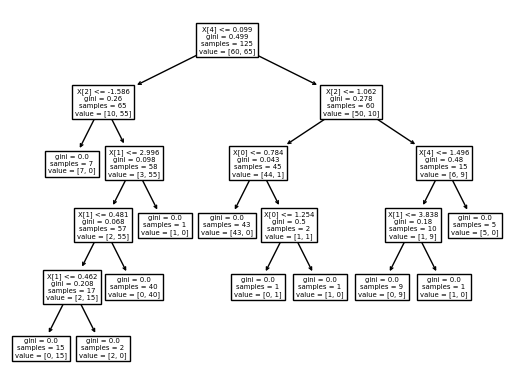

In [87]:
plot_tree(clf1)

[Text(0.4444444444444444, 0.9166666666666666, 'X[4] <= 0.042\ngini = 0.499\nsamples = 125\nvalue = [60, 65]'),
 Text(0.2222222222222222, 0.75, 'X[2] <= -1.242\ngini = 0.15\nsamples = 61\nvalue = [5, 56]'),
 Text(0.1111111111111111, 0.5833333333333334, 'X[4] <= -2.625\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.05555555555555555, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'X[1] <= 2.721\ngini = 0.035\nsamples = 56\nvalue = [1, 55]'),
 Text(0.2777777777777778, 0.4166666666666667, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(0.3888888888888889, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.75, 'X[4] <= 0.463\ngini = 0.242\nsamples = 64\nvalue = [55, 9]'),
 Text(0.5555555555555556, 0.5833333333333334, 'X[2] <= -0.421\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.5,

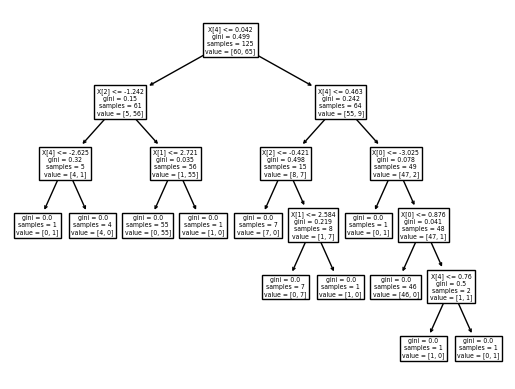

In [88]:
plot_tree(clf2)

[Text(0.3382352941176471, 0.9166666666666666, 'X[4] <= -0.588\ngini = 0.495\nsamples = 125\nvalue = [69, 56]'),
 Text(0.11764705882352941, 0.75, 'X[2] <= -1.965\ngini = 0.169\nsamples = 43\nvalue = [4, 39]'),
 Text(0.058823529411764705, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.17647058823529413, 0.5833333333333334, 'X[1] <= 2.503\ngini = 0.049\nsamples = 40\nvalue = [1, 39]'),
 Text(0.11764705882352941, 0.4166666666666667, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5588235294117647, 0.75, 'X[2] <= 0.724\ngini = 0.329\nsamples = 82\nvalue = [65, 17]'),
 Text(0.4117647058823529, 0.5833333333333334, 'X[3] <= -1.645\ngini = 0.032\nsamples = 61\nvalue = [60, 1]'),
 Text(0.35294117647058826, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.47058823529411764, 0.4166666666666667, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.7058823

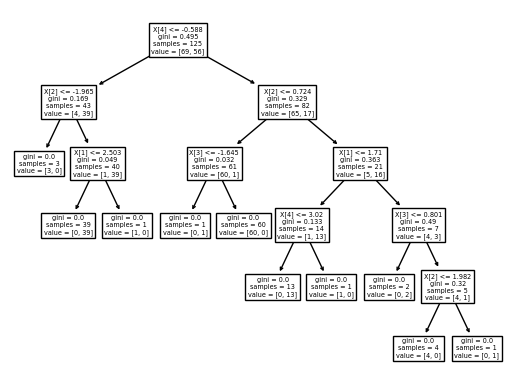

In [89]:
plot_tree(clf3)

In [90]:
# picking a query for prediction (288 row picked for prediction)
query = np.array([-0.282947,0.285676,1.262876,-1.240264,-0.642151]).reshape(1,5)

In [79]:
clf1.predict(query)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [91]:
clf2.predict(query)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [93]:
clf3.predict(query)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

**WE can do pasting and row+col sampling as well**